In [31]:
### 2019-12-18 at Office


import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
loaded_model_path = './saved_model/2019-12-18n_sources_resnet18.mdl'


# EHT_test_path = root_folder + test_folder
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/home/joshua/Documents/git_work_zone/Lens_Finder


In [32]:

glo_batch_size = 1
test_num_batch = 1

class LensDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train# training set or test set


        if self.train:
            self.path = root_dir#os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/train.csv')

        else:
            self.path = root_dir#os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/val.csv')

    def __getitem__(self, index):

        #print(self.df['ID'])
        ID = self.df['ID'].iloc[[index]]
        n_sources = self.df['n_sources'].iloc[[index]]
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        # filepath = "/media/joshua/HDD_fun2/Public/EUC_Y/imageEUC_Y-" + str(ID.values[0]) + ".fits"
        # lens_data = fits.open(filepath)
        # img = lens_data[0].data
        image = np.zeros((4, 224, 224))
        try:
            for i, channel in enumerate(channel_names):
                filepath = self.path + channel + "/image" + channel + "-" + str(ID.values[0]) + ".fits"
                lens_data = fits.open(filepath)
                img = lens_data[0].data
                img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
                image[i, :, :] += img_channel_0
            #pass
        except:
            print("error", ID)
            pass
        #     plt.subplot(1, 4, i+ 1)
        #     plt.imshow(image[i, :, :])
        #     plt.title(channel + str(n_sources.values[0]))
        # plt.show()

        return image, ID.values[0], n_sources.values[0]

    def __len__(self):
        return self.df.shape[0]

In [33]:
test_loader = torch.utils.data.DataLoader(LensDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

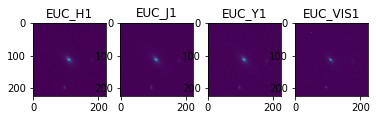

n_sources (ground truth) 1.0
n_sources prediction: 0.92530215


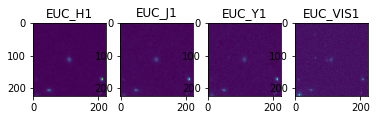

n_sources (ground truth) 1.0
n_sources prediction: 0.9252981


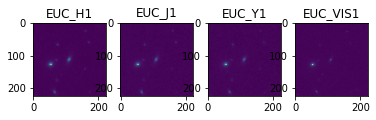

n_sources (ground truth) 1.0
n_sources prediction: 0.92530125


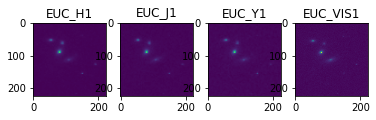

n_sources (ground truth) 1.0
n_sources prediction: 0.92530054


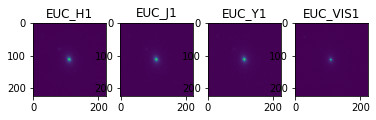

n_sources (ground truth) 1.0
n_sources prediction: 0.9253046


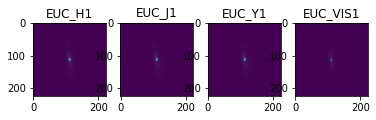

n_sources (ground truth) 1.0
n_sources prediction: 0.92530197


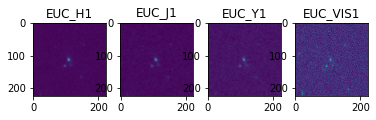

n_sources (ground truth) 1.0
n_sources prediction: 0.92529786


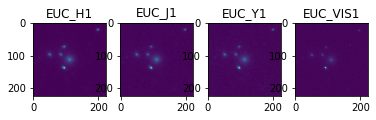

n_sources (ground truth) 1.0
n_sources prediction: 0.9253003


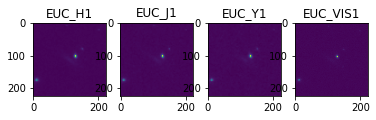

n_sources (ground truth) 1.0
n_sources prediction: 0.92529595


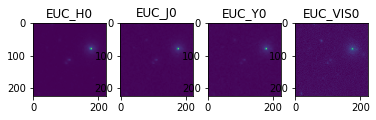

n_sources (ground truth) 0.0
n_sources prediction: 0.92529815


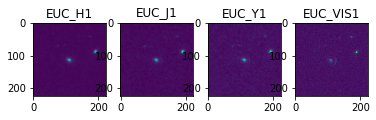

n_sources (ground truth) 1.0
n_sources prediction: 0.9252994


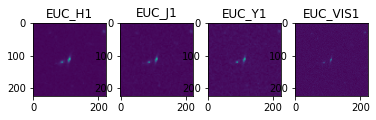

n_sources (ground truth) 1.0
n_sources prediction: 0.92529744


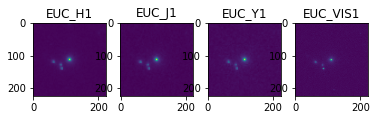

n_sources (ground truth) 1.0
n_sources prediction: 0.9252984


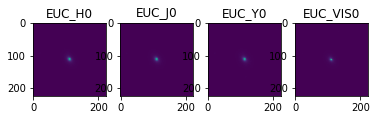

n_sources (ground truth) 0.0
n_sources prediction: 0.9253342


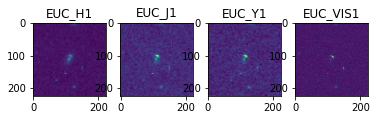

n_sources (ground truth) 1.0
n_sources prediction: 0.92529726


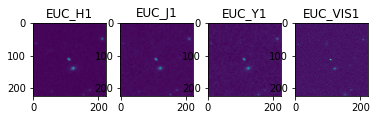

n_sources (ground truth) 1.0
n_sources prediction: 0.9252977


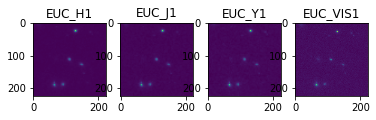

n_sources (ground truth) 1.0
n_sources prediction: 0.9253003


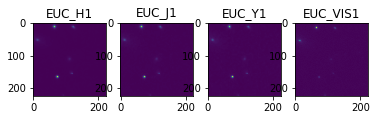

n_sources (ground truth) 1.0
n_sources prediction: 0.92528695


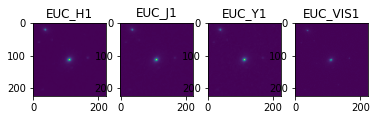

n_sources (ground truth) 1.0
n_sources prediction: 0.92530525


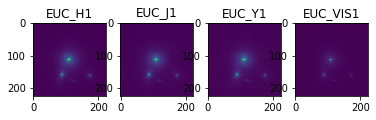

n_sources (ground truth) 1.0
n_sources prediction: 0.92531085


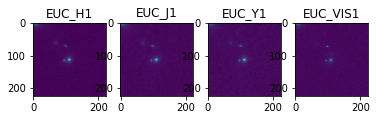

n_sources (ground truth) 1.0
n_sources prediction: 0.92529815


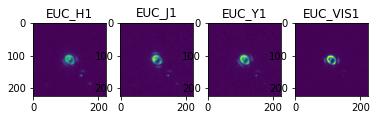

n_sources (ground truth) 1.0
n_sources prediction: 0.92530626


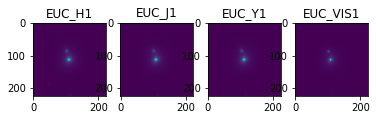

n_sources (ground truth) 1.0
n_sources prediction: 0.9254289


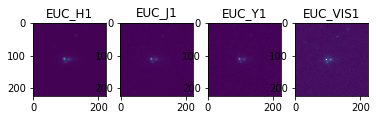

n_sources (ground truth) 1.0
n_sources prediction: 0.92529684


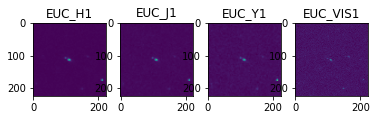

n_sources (ground truth) 1.0
n_sources prediction: 0.92529756


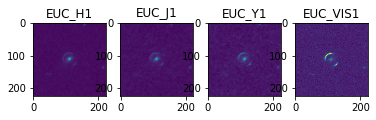

n_sources (ground truth) 1.0
n_sources prediction: 0.92529786


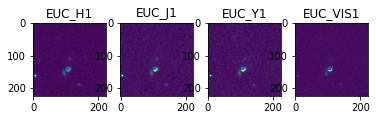

n_sources (ground truth) 1.0
n_sources prediction: 0.92529786


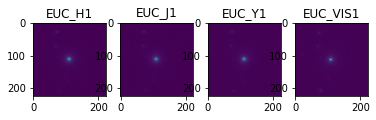

n_sources (ground truth) 1.0
n_sources prediction: 0.92530614


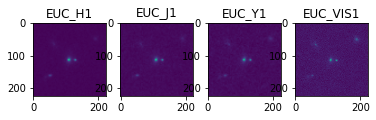

n_sources (ground truth) 1.0
n_sources prediction: 0.9252986


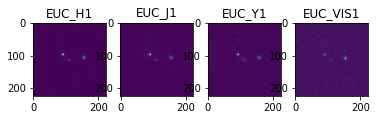

n_sources (ground truth) 1.0
n_sources prediction: 0.925298


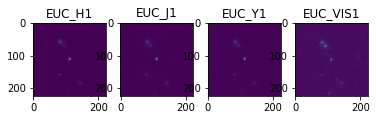

n_sources (ground truth) 1.0
n_sources prediction: 0.9252983


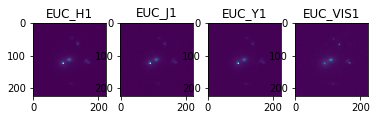

n_sources (ground truth) 1.0
n_sources prediction: 0.92530847


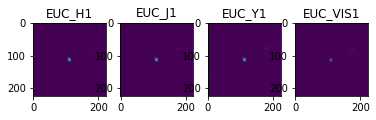

n_sources (ground truth) 1.0
n_sources prediction: 0.92530596


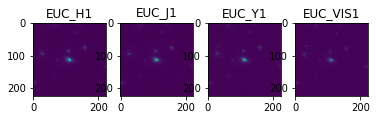

n_sources (ground truth) 1.0
n_sources prediction: 0.92529684


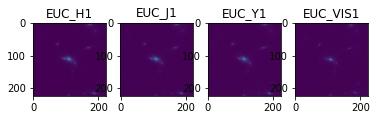

n_sources (ground truth) 1.0
n_sources prediction: 0.9252996


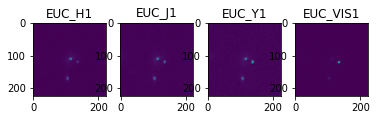

n_sources (ground truth) 1.0
n_sources prediction: 0.9252987


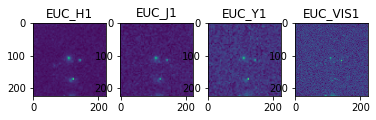

n_sources (ground truth) 1.0
n_sources prediction: 0.9252971


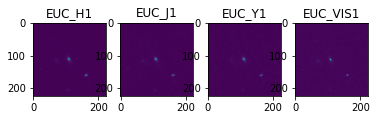

n_sources (ground truth) 1.0
n_sources prediction: 0.9252995


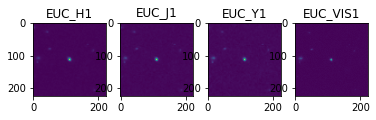

n_sources (ground truth) 1.0
n_sources prediction: 0.92529696


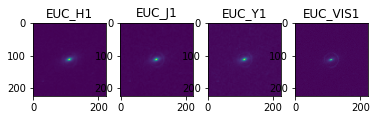

n_sources (ground truth) 1.0
n_sources prediction: 0.92529887


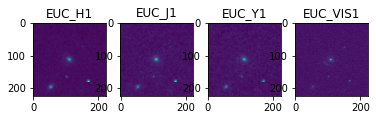

n_sources (ground truth) 1.0
n_sources prediction: 0.925298


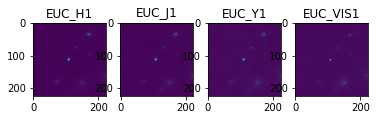

n_sources (ground truth) 1.0
n_sources prediction: 0.9253003


In [35]:
net.cuda()




for batch_idx, (data, ID, n_sources) in enumerate(test_loader):
    data, target = data.float(), n_sources.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
    image = np.zeros((4, 224, 224))
    channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
    for i, channel in enumerate(channel_names):
        filepath = root_folder + channel + "/image" + channel + "-" + str(ID.numpy()[0]) + ".fits"
        lens_data = fits.open(filepath)
        img = lens_data[0].data
        img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
        image[i, :, :] += img_channel_0
        plt.subplot(1, 4, i+ 1)
        plt.imshow(image[i, :, :])
        plt.title(channel + str(n_sources.numpy()[0]))
    plt.show()

    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    print("n_sources (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    output = F.sigmoid(output)
    
    print("n_sources prediction:", output.data.cpu().numpy()[0][0])
    #print("flux tpye (prediction):", pred_flux_type)
    
    
    if batch_idx > 40:
        break